# Test SVM on encoded labels/price data

In [25]:
import pandas as pd
import numpy as np

Define data :
- Data contains products and its prices
- A product is composed of `nb_components` components  
- Each component has its price, defined in `price_per_component` and which is not exposed for learning
- Product's price is computed as a sum on components of the component price multiplied on number of elements of the component: 

```
price(product=p) = sum( price(component=c) * nb_elements(component=c), c in components(product=p) )
```

We want to predict a price a product.

*Conclusions:* 


In [26]:
nb_components = 500
nb_samples = 10000
price_per_component = np.array([i+1 for i in range(nb_components)])
data = np.random.randint(-3, 2, size=[nb_samples, nb_components]) 
data[data < 0] = 0
sums = np.sum(data, axis=1)
data[sums == 0, np.random.randint(nb_components)] += 1
# Add a random element if only one component is found
#sums = np.sum(data, axis=1)
#data[sums == 1, np.random.randint(nb_components)] += 1

In [27]:
def create_name(row):
    return ",".join(['c_'+str(val) for val in np.where(row > 0)[0]])

componentsa_and_quantities = []
for row in data:
    componentsa_and_quantities.append([create_name(row), np.sum(row)])

In [28]:
columns = ['Components', 'Quantity']
prices = np.zeros((nb_samples))

prices[:] = np.dot(data[:, ...], price_per_component)

df = pd.DataFrame(data=componentsa_and_quantities, columns=columns)
df['price'] = pd.Series(prices)

Display input data

In [29]:
print "Prices of components : ", price_per_component
df

Prices of components :  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 24

,Components,Quantity,price
0,"c_12,c_21,c_50,c_51,c_53,c_57,c_62,c_63,c_74,c...",98,26500.0
1,"c_2,c_9,c_14,c_16,c_22,c_23,c_27,c_30,c_38,c_4...",122,31602.0
2,"c_1,c_3,c_4,c_7,c_10,c_13,c_16,c_25,c_26,c_29,...",111,23327.0
3,"c_2,c_5,c_11,c_13,c_26,c_27,c_29,c_32,c_34,c_3...",96,23084.0
4,"c_7,c_14,c_21,c_23,c_25,c_28,c_38,c_48,c_53,c_...",85,21428.0
5,"c_0,c_2,c_4,c_12,c_19,c_20,c_31,c_38,c_43,c_45...",105,27596.0
6,"c_1,c_4,c_17,c_24,c_29,c_34,c_37,c_39,c_46,c_4...",97,24887.0
7,"c_1,c_7,c_18,c_19,c_24,c_27,c_34,c_44,c_45,c_4...",94,24219.0
8,"c_4,c_24,c_29,c_30,c_35,c_41,c_46,c_50,c_54,c_...",99,26847.0
9,"c_11,c_17,c_30,c_40,c_42,c_45,c_54,c_66,c_73,c...",100,25977.0


In [30]:
assert len(df['price'][df['price'] < 1]) == 0, "Zero price is detected"

Train and test data

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

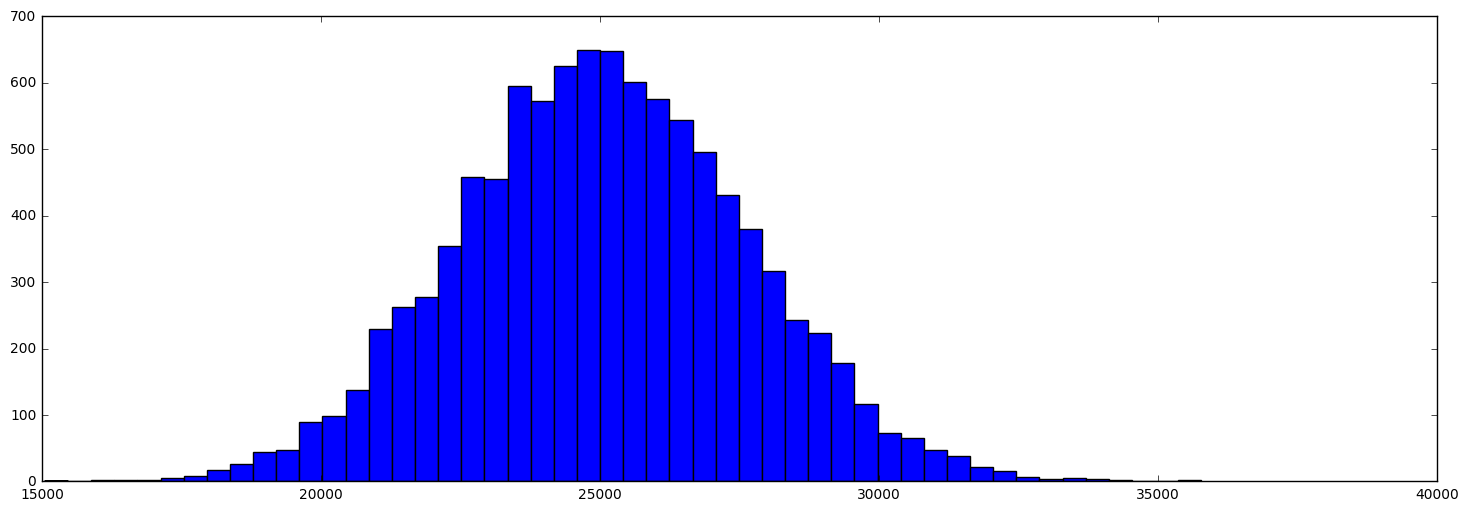

In [32]:
plt.figure(figsize=(18, 6))
out = plt.hist(df['price'], bins=50)

In [33]:
df['logprice'] = df['price'].apply(lambda x: np.log(1 + x))

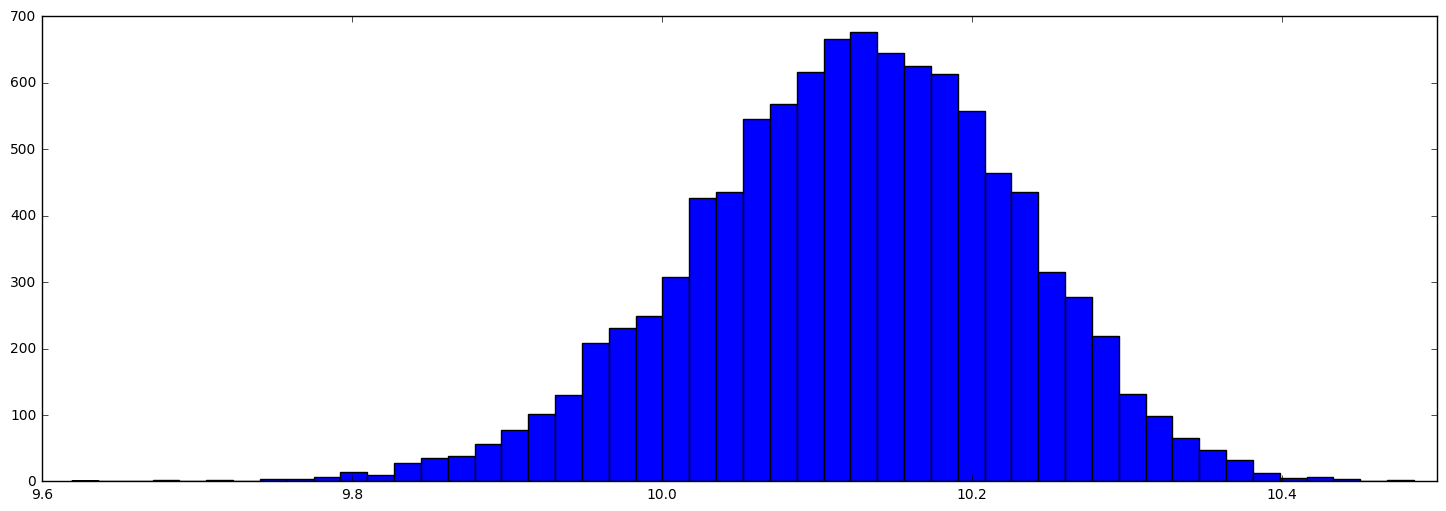

In [34]:
plt.figure(figsize=(18, 6))
out = plt.hist(df['logprice'], bins=50)

Encode data

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()    
le.fit(df['Components'])
df['Components_encoded'] = le.transform(df['Components'])

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [38]:
X0 = df.drop(['price', 'logprice', 'Components'], axis=1)
y = df['price'] 
ylog = df['logprice']

X = StandardScaler().fit_transform(X0)
X_train, X_test, X0_train, X0_test, y_train, y_test, ylog_train, ylog_test = train_test_split(X, X0, y, ylog, test_size=0.75)

In [39]:
X0.describe()

,Quantity,Components_encoded
count,10000.000000,10000.00000
mean,100.016200,4999.50000
std,8.928029,2886.89568
min,69.000000,0.00000
25%,94.000000,2499.75000
50%,100.000000,4999.50000
75%,106.000000,7499.25000
max,137.000000,9999.00000


In [40]:
pd.DataFrame(data=X).describe()

,0,1
count,1.000000e+04,10000.000000
mean,2.533085e-16,0.000000
std,1.000050e+00,1.000050
min,-3.474199e+00,-1.731878
25%,-6.738890e-01,-0.865939
50%,-1.814601e-03,0.000000
75%,6.702598e-01,0.865939
max,4.142644e+00,1.731878


In [41]:
# Mean Absolute Percentage Error
def mape_error(y_true, y_pred, **kwards): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Single run

In [42]:
svr1 = SVR(kernel='linear')
svr1.fit(X_train, y_train)
score = svr1.score(X_train, y_train)
print score
res0 = svr1.predict(X_train)
res1 = svr1.predict(X_test)
print mape_error(y_train, res0)
print mape_error(y_test, res1)

0.596990371649
5.23838405399
5.29591659954


In [43]:
print y_test.tolist()[:10]
print res1[:10]


[31550.0, 24446.0, 24058.0, 24536.0, 26322.0, 23817.0, 28004.0, 23712.0, 26185.0, 26892.0]
[ 27940.55025341  23992.96190072  24490.20426448  24283.45520605
  24806.87470602  24383.62383973  26445.43007539  24207.91249138
  25881.5850146   26444.78715867]


In [44]:
svr1 = SVR(kernel='linear')
svr1.fit(X_train, ylog_train)
score = svr1.score(X_train, ylog_train)
print score
res0 = svr1.predict(X_train)
res1 = svr1.predict(X_test)
print mape_error(ylog_train, res0)
print mape_error(ylog_test, res1)

0.75406917183
0.405095217288
0.417116101324


In [45]:
print ylog_test.tolist()[:10]
print res1[:10]

[10.359360563188138, 10.104262787988329, 10.088264425905146, 10.107937461403084, 10.178198360706745, 10.078196876327942, 10.240138344643933, 10.073778699946109, 10.172980195787698, 10.199621308677711]
[ 10.34701452  10.05569337  10.0812524   10.08143099  10.11509103
  10.08034957  10.23720689  10.05805289  10.1910364   10.23700792]


In [46]:
svr1 = SVR(kernel='linear', C=2)
svr1.fit(X_train, y_train)
score = svr1.score(X_train, y_train)
print score
res0 = svr1.predict(X_train)
res1 = svr1.predict(X_test)
print mape_error(y_train, res0)
print mape_error(y_test, res1)

0.704738096029
4.49297373465
4.55487609062


In [47]:
# "ENDLESS" COMPUTATION ON UNNORMALIZED ENCODED DATA
svr2 = SVR(kernel='linear')
svr2.fit(X0_train, y_train)
score = svr2.score(X0_train, y_train)
print score
res0 = svr2.predict(X0_train)
res2 = svr2.predict(X0_test)
print mape_error(y_train, res0)
print mape_error(y_test, res2)

KeyboardInterrupt: 

In [24]:
print y_test.tolist()[:10]
print res2[:10]

[4.0, 16.0, 14.0, 7.0, 5.0, 7.0, 22.0, 8.0, 8.0, 8.0]
[  7.60987442  13.54207781  14.55684025   7.54426451   9.27089137
   7.54426451  19.42124703   7.90019672   7.90019672   8.67767103]


Cross validation scoring

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [49]:
clf = SVR(kernel='linear', C=2)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring=make_scorer(mape_error))
print scores      
print scores.mean(), scores.std()

[ 4.76958774  4.53725366  4.83152882  4.61533358  4.79476741]
4.70969424064 0.113409018723


In [50]:
clf = SVR(kernel='linear', C=2)
scores = cross_val_score(clf, X_train, ylog_train, cv=5, scoring=make_scorer(mape_error))
print scores      
print scores.mean(), scores.std()

[ 0.40622445  0.40132601  0.40298637  0.39736772  0.42056571]
0.405694051547 0.00796475634678


In [ ]:
clf = SVR(kernel='linear', C=2)
scores = cross_val_score(clf, X0_train, y_train, cv=5, scoring=make_scorer(mape_error))
print scores      
print scores.mean(), scores.std()